# **Characterization of microRNAs in Retinal Ganglion Cells of Glaucoma Animal Models**

### I- Introduction

microRNAs are small non-coding RNA sequences involved in regulating gene expression in normal physiology and disease. Specifically, studies have implicated microRNAs in neuroprotective and neurodegenerative processes.

The aim of this script is to identify miRNA sequences and changes in their abundance in retinal ganglion cells isolated from healthy rats and different rat models of Glaucoma including:

* Seven days after laser-induced ocular hypertension (Glaucomatous damage), denoted Glaucoma.
* Two days after traumatic optic nerve crush, denoted ONC_2d.
* Seven days after  traumatic optic nerve crush, denoted ONC_7d.

These candidate sequences could then be used for  *in vivo* and *in vitro* experiments to further understand their mechanisms of action in the pathophysiology of Glaucoma and/or their therapeutic potentials

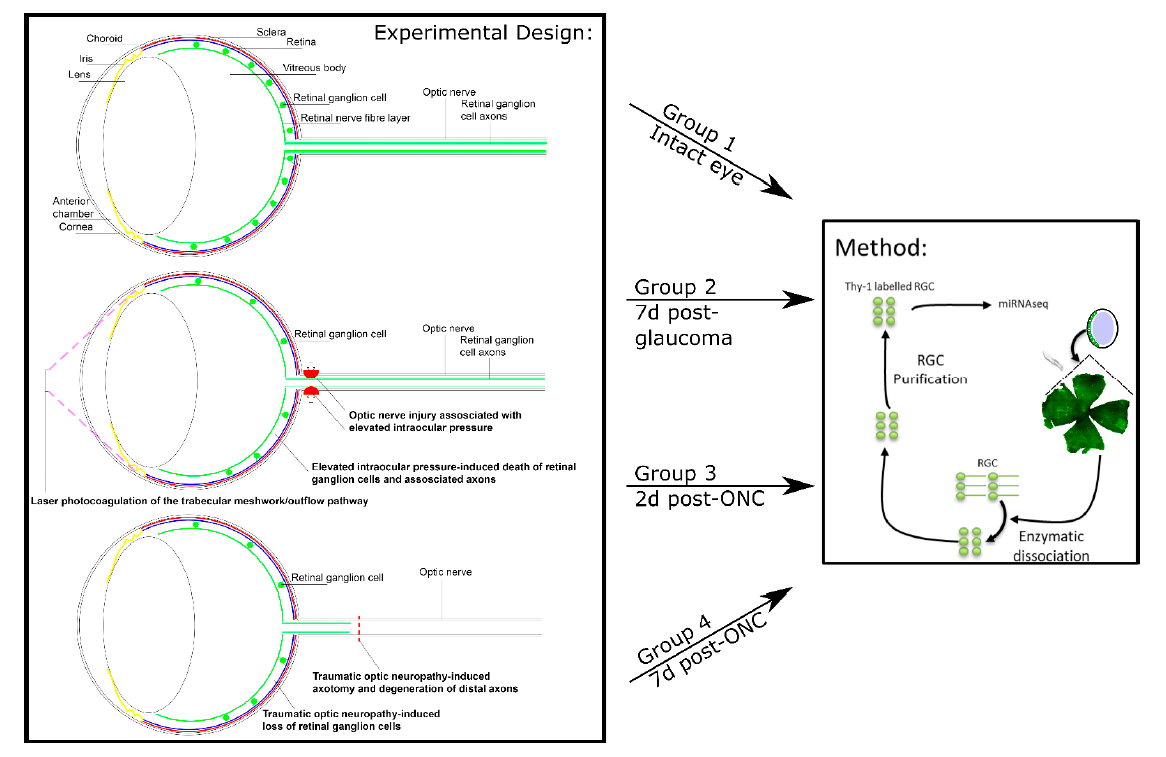

figure 1. Experimental design (Mead et al. 2021)

### II- Script

In [1]:
# Import Libraries:

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from matplotlib import pyplot as plt


In [2]:
#Import and Visualize dataset
raw_dataset = pd.read_csv('dataset_miRNA_abundance.csv')
raw_dataset.head()

,miR_seq,G1,G2,G3,I1,I2,I3,ONC 2d 1,ONC2d 2,ONC 2d 3,ONC 7d 1,ONC 7d 2,ONC 7d 3
0,TTTGAACCATCACTCGACTCCT,10745.0,16073.0,13219.0,5271.0,7250.0,7304.0,7583.0,7099.0,7017.0,29672.0,30964.0,32293.0
1,CACATTACACGGTCGACCTCT,433.0,588.0,418.0,453.0,318.0,375.0,221.0,277.0,280.0,1266.0,1298.0,1213.0
2,ACCATCGACCGTTGATTGTACC,48.0,45.0,64.0,1184.0,910.0,1052.0,1405.0,1223.0,1378.0,331.0,210.0,258.0
3,AACATTCATTGTTGTCGGTGGGT,330.0,308.0,297.0,2432.0,2071.0,2580.0,2495.0,2235.0,2655.0,690.0,901.0,757.0
4,TATTCATTTACTCCCCAGCCTACA,952.0,1192.0,1322.0,174.0,275.0,254.0,137.0,200.0,182.0,1430.0,1331.0,1492.0


In [3]:
## Data Cleaning and Reshaping to allow statistical analyses: 
#The data set displays data points for each microRNA isolated for 3 subjects per condition as columns:
#Healthy orIntact animals: I1,I2,I3
#Glaucoma: G1, G2, G3 
#ONC 2days: ONC2d 1,ONC2d 2,ONC2d 3
#ONC 7days: ONC7d 1,ONC7d 2,ONC7d 3

work_dataset=raw_dataset.transpose()
dict_of_seq = {} # initialize empty dictionary to organize subjects by Conditions
for i in work_dataset:
    dict_of_seq["seq_{}".format(i)]=work_dataset[[i]]

In [4]:
#Concatenation of data by condition 
#Performance of one way ANOVA to determine microRNA sequences with ost significant changes between 

pval_all =[] # initializing list with p values indicating significant difference between all conditions
pval_IG= [] # initializing list with p values indicating significant difference between Intact and Glaucoma Condition
pval_IONC2=[]# initializing list with p values indicating significant difference between Intact and 2 days after ONC
pval_IONC7=[]# initializing list with p values indicating significant difference between Intact and 7 days after ONC
pval_IONC27=[]# initializing list with p values indicating significant difference between 2 days and 7 days after ONC
pval_GONC7=[]# initializing list with p values indicating significant difference between Glaucoma and 7 days after ONC


for e in dict_of_seq.keys():
    a=dict_of_seq[e].transpose()
    
    t=a[['G1','I1','ONC 2d 1','ONC 7d 1']]
    h=a[['G2','I2','ONC2d 2','ONC 7d 2']]
    w=a[['G3','I3','ONC 2d 3','ONC 7d 3']]
                   
    h.columns=['G1','I1','ONC 2d 1','ONC 7d 1']
    w.columns=['G1','I1','ONC 2d 1','ONC 7d 1']
    seq_data=pd.concat([t,h,w], join='outer')
            
    group1 = seq_data[['I1']]
    group2 = seq_data[['G1']]
    group3 = seq_data[['ONC 2d 1']]
    group4=seq_data[['ONC 7d 1']]
            
    
# Perform ANOVA to test for significant differences between group means
    f, p = f_oneway(group1, group2,group3,group4)
    pval_all.append(p)
    f1,p1= f_oneway(group1, group2)
    pval_IG.append(p1)
    f2,p2= f_oneway(group1,group3)
    pval_IONC2.append(p2)
    f3,p3= f_oneway(group1,group4)
    pval_IONC7.append(p3) 
    f4,p4= f_oneway(group3,group4)
    pval_IONC27.append(p4) 
    f5,p5= f_oneway(group2,group4)
    pval_GONC7.append(p5) 

#the following error indicates p-values equal to zero because of the abscence of some microRNA sequences in some Conditions

C:\Users\c23035613\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [5]:
#Add p-values to the raw dataset and rename columns:
raw_dataset['p-values between groups']=pval_all
raw_dataset['p-values Intact vs Glaucoma']= pval_IG
raw_dataset['p-values Intact vs ONC2']=pval_IONC2
raw_dataset['p-values Intact vs ONC7']=pval_IONC7
raw_dataset['p-values ONC2 vs ONC7']=pval_IONC27
raw_dataset['p-values Glaucoma vs ONC7']=pval_GONC7

#Sort work dataset to have an ascending list of microRNA sequences with most significant differences between all conditions
raw_dataset.sort_values(by = 'p-values between groups', ascending = True )


,miR_seq,G1,G2,G3,I1,I2,I3,ONC 2d 1,ONC2d 2,ONC 2d 3,ONC 7d 1,ONC 7d 2,ONC 7d 3,p-values between groups,p-values Intact vs Glaucoma,p-values Intact vs ONC2,p-values Intact vs ONC7,p-values ONC2 vs ONC7,p-values Glaucoma vs ONC7
0,TTTGAACCATCACTCGACTCCT,10745.0,16073.0,13219.0,5271.0,7250.0,7304.0,7583.0,7099.0,7017.0,29672.0,30964.0,32293.0,[2.205308039640027e-07],[0.015941471118817666],[0.417588653286766],[1.7498534224321207e-05],[6.831613647259147e-06],[0.000505227589979449]
1,CACATTACACGGTCGACCTCT,433.0,588.0,418.0,453.0,318.0,375.0,221.0,277.0,280.0,1266.0,1298.0,1213.0,[2.314569434828056e-07],[0.21844104722757166],[0.04808037173172437],[4.58257354059089e-05],[5.76109972287109e-06],[0.00019910197536455806]
2,ACCATCGACCGTTGATTGTACC,48.0,45.0,64.0,1184.0,910.0,1052.0,1405.0,1223.0,1378.0,331.0,210.0,258.0,[2.9609897331458787e-07],[0.0002313306366341232],[0.04217508635418515],[0.0008310967189557269],[8.878216410002246e-05],[0.0038831585298655714]
3,AACATTCATTGTTGTCGGTGGGT,330.0,308.0,297.0,2432.0,2071.0,2580.0,2495.0,2235.0,2655.0,690.0,901.0,757.0,[6.530178355930711e-07],[0.0001727433964437284],[0.6320575558511518],[0.0006438070129720514],[0.00025678540248023993],[0.001711212282356048]
4,TATTCATTTACTCCCCAGCCTACA,952.0,1192.0,1322.0,174.0,275.0,254.0,137.0,200.0,182.0,1430.0,1331.0,1492.0,[8.91616229482617e-07],[0.001218979561896073],[0.16386718961302504],[2.981664263935079e-05],[1.6068208696423257e-05],[0.0904427544648663]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,CGAATGAACTAGCCCTGAAA,17.0,34.0,0.0,29.0,14.0,0.0,44.0,11.0,8.0,36.0,0.0,10.0,[0.9673160868758095],[0.8463418031434251],[0.6642905788194245],[0.9449538877076259],[0.7372213025375203],[0.9142714029847714]
657,AGGGCTTAGCTGCTTGTGAGCA,26.0,0.0,0.0,6.0,6.0,11.0,10.0,6.0,13.0,18.0,0.0,0.0,[0.9674891230780116],[0.9152452132618751],[0.4885138205530714],[0.8022074888925437],[0.5936620951761034],[0.8127513778367229]
659,TGTGTTTTGTGTGTGTACATGT,0.0,11.0,9.0,2.0,8.0,6.0,3.0,9.0,6.0,5.0,0.0,17.0,[0.9749330908796815],[0.7443512227441687],[0.800747199109934],[0.7271990946314066],[0.8149020114591816],[0.9178827881227488]
660,CAACCCTAGGAGGGGGTGCCATTC,0.0,0.0,18.0,7.0,6.0,5.0,5.0,5.0,4.0,20.0,0.0,0.0,[0.9906261523573799],[1.0],[0.11611652351681546],[0.925433784817805],[0.7793869809434483],[0.9443170116969769]


**For this dataset, it seems that it has been already organized in ascending order of p-values!**

In [6]:
# Exploring mean microRNA sequences abundance:
# Top 10 candidates with most significant differences between groups
# Identifying the microRNA sequence with most significant changes between Intact and diseases and the nature of those changes

miRseq_data=raw_dataset[['miR_seq']]
g_data= raw_dataset[["G1","G2","G3"]]
i_data=raw_dataset[['I1','I2','I3']]
onc_2d_data=raw_dataset[["ONC 2d 1","ONC2d 2","ONC 2d 3"]]
onc_7d_data=raw_dataset[["ONC 7d 1","ONC 7d 2","ONC 7d 3"]]
g_data_mean=g_data.mean(axis=1)
i_data_mean=i_data.mean(axis=1)
onc_2d_data_mean=onc_2d_data.mean(axis=1)
onc_7d_data_mean=onc_7d_data.mean(axis=1)
mean_data=pd.concat([miRseq_data, i_data_mean, g_data_mean, onc_2d_data_mean ,onc_7d_data_mean], axis=1, join='outer')
mean_data.rename(columns={'miR_seq':'miRNA_seq', 0:'Intact', 1:'Glaucoma', 2:'ONC_2d', 3:'ONC_7d'},inplace=True)
new_data=mean_data.set_index('miRNA_seq')
new_data['p-values between groups']=pval_all
new_data['p-values Intact vs Glaucoma']= pval_IG
new_data['p-values Intact vs ONC2']=pval_IONC2
new_data['p-values Intact vs ONC7']=pval_IONC7
new_data['p-values ONC2 vs ONC7']=pval_IONC27
new_data['p-values Glaucoma vs ONC7']=pval_GONC7
top_10=new_data.head(10)
top_10

,Intact,Glaucoma,ONC_2d,ONC_7d,p-values between groups,p-values Intact vs Glaucoma,p-values Intact vs ONC2,p-values Intact vs ONC7,p-values ONC2 vs ONC7,p-values Glaucoma vs ONC7
miRNA_seq,,,,,,,,,,
TTTGAACCATCACTCGACTCCT,6608.333333,13345.666667,7233.000000,30976.333333,[2.205308039640027e-07],[0.015941471118817666],[0.417588653286766],[1.7498534224321207e-05],[6.831613647259147e-06],[0.000505227589979449]
CACATTACACGGTCGACCTCT,382.000000,479.666667,259.333333,1259.000000,[2.314569434828056e-07],[0.21844104722757166],[0.04808037173172437],[4.58257354059089e-05],[5.76109972287109e-06],[0.00019910197536455806]
ACCATCGACCGTTGATTGTACC,1048.666667,52.333333,1335.333333,266.333333,[2.9609897331458787e-07],[0.0002313306366341232],[0.04217508635418515],[0.0008310967189557269],[8.878216410002246e-05],[0.0038831585298655714]
AACATTCATTGTTGTCGGTGGGT,2361.000000,311.666667,2461.666667,782.666667,[6.530178355930711e-07],[0.0001727433964437284],[0.6320575558511518],[0.0006438070129720514],[0.00025678540248023993],[0.001711212282356048]
TATTCATTTACTCCCCAGCCTACA,234.333333,1155.333333,173.000000,1417.666667,[8.91616229482617e-07],[0.001218979561896073],[0.16386718961302504],[2.981664263935079e-05],[1.6068208696423257e-05],[0.0904427544648663]
CCGCACTGTGGGTACTTGCTGC,244.666667,58.666667,258.000000,93.666667,[1.4113190585212798e-06],[0.0005276934378039794],[0.4700113859402855],[0.0005131582477482473],[9.767586210532195e-05],[0.05297752310600454]
TGAGGTAGTAGTTTGTGCTGTTA,44627.000000,17533.666667,48244.000000,19461.666667,[2.1459584951333947e-06],[0.000774305489848192],[0.2149879895804521],[0.000290885594758096],[0.00012297719614029533],[0.4896110638397725]
TCGGATCCGTCTGAGCTTGGCT,84762.333333,6742.000000,107963.000000,27312.666667,[2.6016748636615954e-06],[0.0005007648111618744],[0.0878211989760949],[0.0018152737077761685],[0.0004093345306486956],[0.0011352261495076181]
TCTCTGGGCCTGTGTCTTAG,866.333333,374.666667,822.333333,632.666667,[2.8144355361490908e-06],[7.078134581600182e-05],[0.2124188324558145],[0.006420393086648612],[0.010128070884241435],[0.003212855836144354]


In [7]:
#Finding microRNA sequences with significant differences in abundance between conditions (p-values<0.05)
IG_p=top_10['p-values Intact vs Glaucoma']
v = np.where(IG_p < 0.05, IG_p.index,0)
glaucoma_intact_sig=pd.DataFrame(v)

IONC2_p=top_10['p-values Intact vs ONC2']
s = np.where(IONC2_p < 0.05, IONC2_p.index,0)
ONC2_intact_sig=pd.DataFrame(s)

IONC7_p=top_10['p-values Intact vs ONC7']
k= np.where(IONC7_p < 0.05, IONC7_p.index,0)
ONC7_intact_sig=pd.DataFrame(k)

ONC27_p=top_10['p-values ONC2 vs ONC7']
c= np.where(ONC27_p <= 0.05, ONC27_p.index,0)
ONC7_ONC2_sig=pd.DataFrame(c)

GONC7_p=top_10['p-values Glaucoma vs ONC7']
m= np.where(GONC7_p < 0.05, GONC7_p.index,0)
GONC7_sig=pd.DataFrame(m)

In [8]:
#Finding the microRNA sequence with the most significant change between conditions
seq_mostsig_IG=np.min(v[np.nonzero(v)])
seq_mostsig_IONC2=np.min(s[np.nonzero(s)])
seq_mostsig_IONC7=np.min(k[np.nonzero(k)])
seq_mostsig_ONC27=np.min(c[np.nonzero(c)])
seq_mostsig_GONC7=np.min(m[np.nonzero(m)])

In [9]:
# Identify common microRNA sequences that most significantly change between Glaucoma and ONC_7 as compared to Intact
int_2models = pd.merge(glaucoma_intact_sig, ONC7_intact_sig,how ='inner') 
int_allmodels = pd.merge(int_2models, ONC2_intact_sig,how ='inner')
common_sequence=int_allmodels.iloc[:,0].to_string(header=False, index=False)



#Identify the nature of the change of this sequence (increase, decrease and magnitude):
mean_differences_IG=top_10['Intact']-top_10['Glaucoma']
mean_differences_ONC7=top_10['Intact']-top_10['ONC_7d']
mean_diff_forcommon_IG=mean_differences_IG[common_sequence]
mean_diff_forcommon_ONC7=mean_differences_ONC7[common_sequence]

mean_ratio_IG=top_10['Intact']/top_10['Glaucoma']
mean_ratio_IONC7=top_10['Intact']/top_10['ONC_7d']
mean_ratio_forcommon_IG=mean_ratio_IG[common_sequence]
mean_ratio_forcommon_ONC7=mean_ratio_IONC7[common_sequence]

   

### III- Results and Conclusion

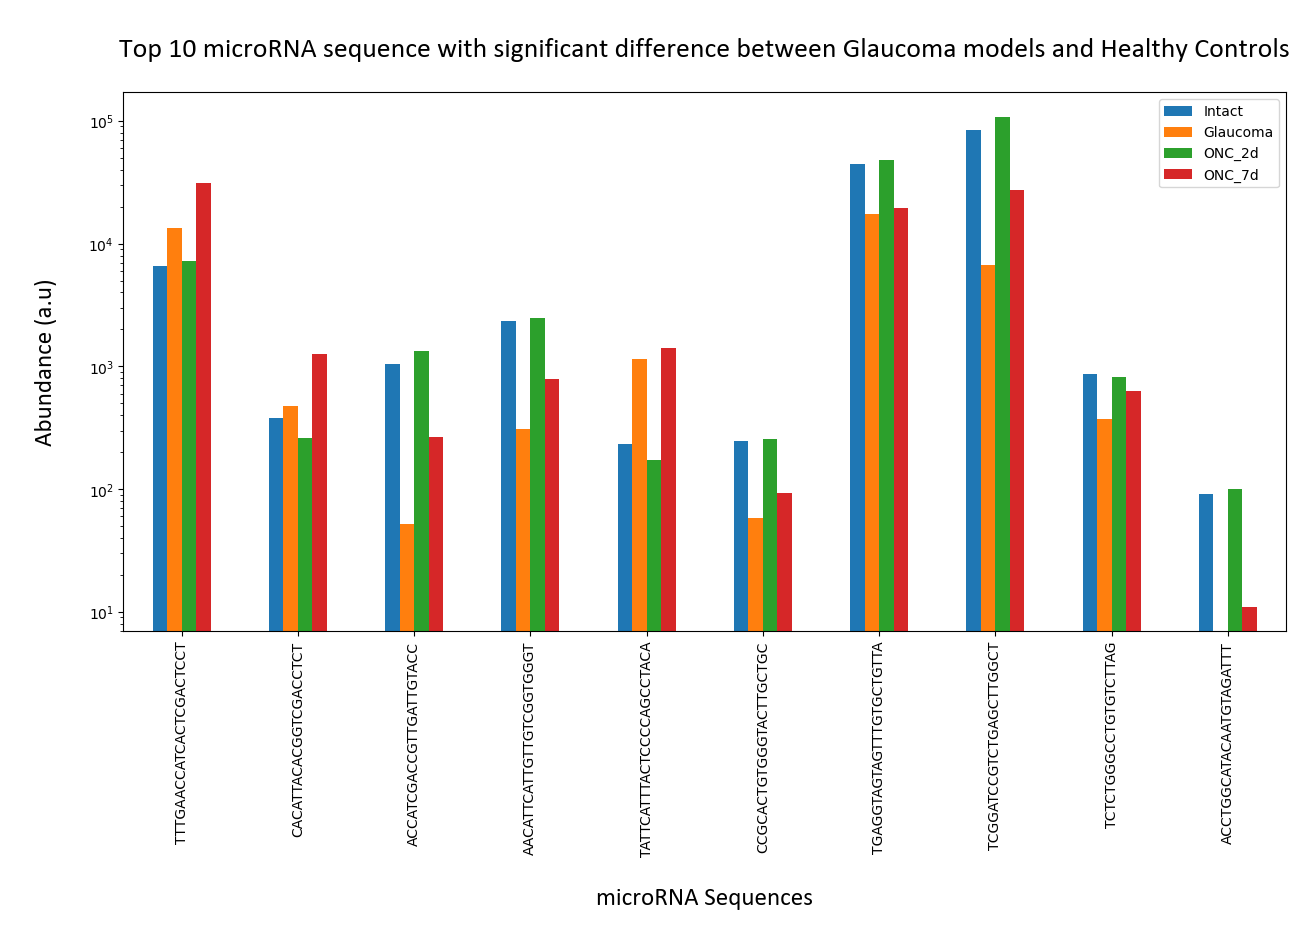



The microRNA sequence with most significant change between Intact and Glaucoma is AACATTCATTGTTGTCGGTGGGT
The microRNA sequence with most significant change between Intact and 2 days after ONC is ACCATCGACCGTTGATTGTACC
The microRNA sequence with most significant change between Intact and 7 days after ONC is AACATTCATTGTTGTCGGTGGGT
The microRNA sequence with most significant change between 2 and 7 days after ONC is AACATTCATTGTTGTCGGTGGGT
The microRNA sequence with most significant change between Glaucoma and 7 days after ONC is AACATTCATTGTTGTCGGTGGGT

Hence, the microRNA sequence that is consistantly changing regardless of the animal model is ACCATCGACCGTTGATTGTACC

The abundance of microRNA sequence ACCATCGACCGTTGATTGTACC in the Glaucomatous damage model decreases by 20 folds as compared to healthy rats.
The abundance of microRNA sequence ACCATCGACCGTTGATTGTACC in the Optic Nerve Crush model decreases by 4 folds as compared to healthy rats.


In conclusion,the microRNA sequence whi

In [10]:
#Visualzing top 10 microRNA sequences with smallest p-values between conditions
ax1=top_10.plot(kind='bar',figsize=(15,7))
ax1.set_yscale('log')

font1 = {'family':'calibri','size':20}
font2 = {'family':'calibri','size':18}
plt.title('\nTop 10 microRNA sequences with significant difference between Glaucoma models and Healthy Controls\n',fontdict = font1)
plt.xlabel("\nmicroRNA Sequences\n",fontdict=font2)
plt.ylabel("\nAbundance (a.u)\n",fontdict=font2)

plt.show()

##Conclusive statements

print('\n\nThe microRNA sequence with most significant change between Intact and Glaucoma is',seq_mostsig_IG )
print('The microRNA sequence with most significant change between Intact and 2 days after ONC is',seq_mostsig_IONC2)
print('The microRNA sequence with most significant change between Intact and 7 days after ONC is',seq_mostsig_IONC7)
print('The microRNA sequence with most significant change between 2 and 7 days after ONC is',seq_mostsig_ONC27)
print('The microRNA sequence with most significant change between Glaucoma and 7 days after ONC is', seq_mostsig_GONC7)
print('\nHence, the microRNA sequence that is consistantly changing regardless of the animal model is', common_sequence)
if mean_diff_forcommon_IG >0:
  print('\nThe abundance of microRNA sequence', common_sequence,'in the Glaucomatous damage model decreases by', round(mean_ratio_forcommon_IG), 'folds as compared to healthy rats.')
elif mean_diff_forcommon_IG < 0:
  print('The abundance of microRNA sequence', common_sequence,' in the Glaucomatous damage model increases by', round(mean_ratio_forcommon_IG), 'folds as compared to healthy rats.')

if mean_diff_forcommon_ONC7 >0:
  print('The abundance of microRNA sequence', common_sequence,'in the Optic Nerve Crush model decreases by', round(mean_ratio_forcommon_ONC7), 'folds as compared to healthy rats.')
elif mean_diff_forcommon_ONC7 < 0:
  print('The abundance of microRNA sequence', common_sequence,'in the Optic Nerve Crush model increases by', round(mean_ratio_forcommon_ONC7), 'folds as compared to healthy rats.')    

print('\n\nIn conclusion,the microRNA sequence which changes significantly in abundance among all animal models of Glaucoma\nas compared to healthy controls is',common_sequence,'. It is then a strong potential candidate for experimental testing of its implication in Glaucoma pathophysiology.')